In [1]:
%load_ext autoreload
%autoreload 2
import sys
sys.path.append("../")
from sklearn.neural_network import MLPRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from csge import CoopetitiveSoftGatingEnsemble as CSGE
from csge import utils
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import median_absolute_error, r2_score
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%config Completer.use_jedi = False

/home/wire/anaconda3/envs/csge/lib/python3.7/site-packages/ipykernel_launcher.py:18: UserWarning: Config option `use_jedi` not recognized by `IPCompleter`.


# Global weighting

In [2]:
class f1:
    def fit(self, X, y):
        return
    def predict(self, X):
        return np.reshape(np.sin(X), [-1, 1])
class f2:
    def fit(self, X, y):
        return
    def predict(self, X):
        return np.reshape(np.sin(X) + 10, [-1, 1])

In [3]:
def g(x, offset):
    return np.sin(x) + offset

In [4]:
x_axis = np.arange(-2*np.pi, 2*np.pi, 0.1)
x_axis = np.reshape(x_axis, [-1, 1])
targets = g(x_axis, 4)
targets = np.reshape(targets, [-1, 1])

In [5]:
model = CSGE([f1, f2], error_function=mean_absolute_error)
model.eta = [1, 0, 0]
model.fit(x_axis, targets)

In [6]:
y0 = model.predict(x_axis)
y1 = f1().predict(x_axis)
y2 = f2().predict(x_axis)

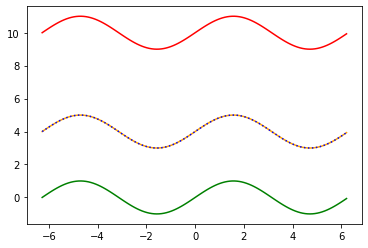

In [7]:
plt.plot(x_axis, y0, c='orange')
plt.plot(x_axis, y1, c='green')
plt.plot(x_axis, y2, c='red')
plt.plot(x_axis, targets, 'b:')

# Local weighting

In [8]:
class f1:
    def fit(self, X, y):
        return
    def predict(self, X):
        return np.reshape(np.sin(X), [-1, 1])
class f2:
    def fit(self, X, y):
        return
    def predict(self, X):
        return np.reshape(np.sin(X) + 10, [-1, 1])

In [9]:
def g(x):
    res = []
    for val in x:
        offset = 0
        if val<= 15 and val>10:
            offset = 10
        res.append(np.sin(val) + offset)
    return np.array(res)

In [10]:
x_axis = np.arange(0, 20, 0.1)
x_axis = np.reshape(x_axis, [-1, 1])
targets = g(x_axis)
targets = np.reshape(targets, [-1, 1])

In [11]:
model = CSGE([f1, f2], error_function=mse, model_forecast_local_error=RandomForestRegressor)
model.eta = [0, 3.5, 0]
model.fit(x_axis, targets)

In [12]:
y0 = model.predict(x_axis)
y1 = f1().predict(x_axis)
y2 = f2().predict(x_axis)

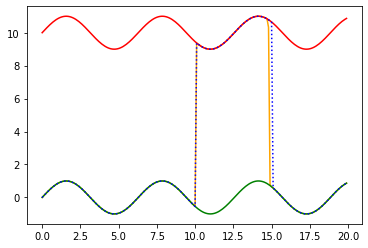

In [13]:
plt.plot(x_axis, y0, c='orange')
plt.plot(x_axis, y1, c='green')
plt.plot(x_axis, y2, c='red')
plt.plot(x_axis, targets, 'b:')

# Time-dependent weighting

In [14]:
%load_ext autoreload
%autoreload 2
import sys
sys.path.append("../")
from sklearn.neural_network import MLPRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from csge import CoopetitiveSoftGatingEnsemble as CSGE
from csge import utils
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import median_absolute_error, r2_score
import numpy as np
import matplotlib.pyplot as plt
%config Completer.use_jedi = False

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


/home/wire/anaconda3/envs/csge/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: Config option `use_jedi` not recognized by `IPCompleter`.
  app.launch_new_instance()


In [15]:
class f1:
    def fit(self, X, y, t):
        return
    def predict(self, X, t):
        res = np.zeros([len(X), len(t)])
        for i in range(len(t)):
            res[:, i] = np.reshape(np.sin(X), -1)
        return res
class f2:
    def fit(self, X, y, t):
        return
    def predict(self, X, t):
        res = np.zeros([len(X), len(t)])
        for i in range(len(t)):
            res[:, i] = np.reshape(np.sin(X) + 10, -1)
        return res

In [16]:
def g(x, t):
    res = np.zeros([len(x), len(t)])
    for i, val_x in enumerate(x):
        for j, val_t in enumerate(t):
            res_val = np.sin(val_x)
            if val_t >= 3:
                res_val += 10
            res[i, j] = res_val
    return res

In [17]:
x_axis = np.arange(-2 * np.pi, 2 * np.pi, 0.1)
x_axis = np.reshape(x_axis, [-1, 1])
t_axis = np.arange(0, 6, 1)
t_axis = np.reshape(t_axis, [-1, 1])
targets = g(x_axis, t_axis)

In [18]:
model = CSGE([f1, f2], error_function=mse, model_forecast_time_error=KNeighborsClassifier)
model.eta = [0, 0, 3.5]
model.leadtime_k = 6
model.fit(x_axis, targets)

../csge/csge.py:136: RuntimeWarning: divide by zero encountered in true_divide
  self.global_errors = (1 / self.error_matrix[:,:,0].mean(0)).reshape(1, -1)


In [19]:
y0 = model.predict(x_axis, t_axis)
y1 = f1().predict(x_axis, t_axis)
y2 = f2().predict(x_axis, t_axis)

../csge/csge.py:127: RuntimeWarning: invalid value encountered in true_divide
  weights /= sum_weights


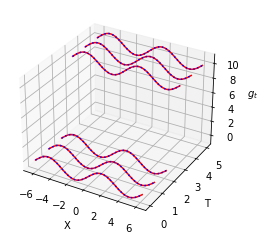

In [20]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.set_xlabel("X")
ax.set_ylabel("T")
ax.set_zlabel("$g_t$")
ax.zaxis.set_rotate_label(False)
for i in range(6):
    ax.plot(xs=x_axis[:,0], ys=targets[:,i], zs = i, zdir='y', c='r')
    ax.plot(xs=x_axis[:,0], ys=y0[:,i], zs = i, zdir='y', c='b', linestyle=':')
    